# Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime

from prophet import Prophet

# Combine and explore dataset

In [2]:
df = pd.read_csv("../datasets/BTC/gemini_BTCUSD_day.csv")

In [3]:
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715
1,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
3,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
4,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
...,...,...,...,...,...,...,...,...
2289,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2290,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2291,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2292,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068


In [4]:
df.rename({"Unix Timestamp": "Timestamp"}, axis=1, inplace=True)

In [5]:
df.set_index('Timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2294 entries, 1642390000000.0 to 1444276800.0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2294 non-null   object 
 1   Symbol  2294 non-null   object 
 2   Open    2294 non-null   float64
 3   High    2294 non-null   float64
 4   Low     2294 non-null   float64
 5   Close   2294 non-null   float64
 6   Volume  2294 non-null   float64
dtypes: float64(5), object(2)
memory usage: 143.4+ KB


In [6]:
df.sort_index(inplace=True)

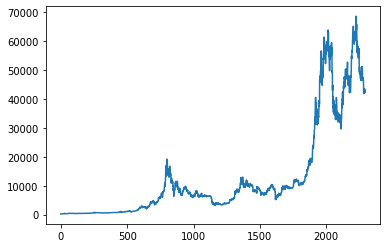

In [7]:
data_close = df['Close']
data_close = data_close.values.reshape(len(data_close), 1)
plt.plot(data_close)
plt.show()

In [8]:
len(data_close)

2294

# Build model

In [9]:
# initialise the forecasting model
model = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=True, seasonality_mode='multiplicative', growth='linear')

In [10]:
df = df.rename({'Date': 'ds', 'Close': 'y'}, axis='columns')
df

,ds,Symbol,Open,High,Low,y,Volume
Timestamp,,,,,,,
1.444277e+09,08/10/2015 04:00,BTCUSD,0.00,245.00,0.00,243.60,34.754703
1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068
1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
...,...,...,...,...,...,...,...
1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677


In [11]:
model.fit(df)
future = model.make_future_dataframe(periods = 91)
forecast = model.predict(future)

Initial log joint probability = -50.5788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4641.04    0.00475242       190.993      0.8051      0.8051      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     171       4661.44    0.00119554        443.66   3.441e-06       0.001      246  LS failed, Hessian reset 
     190       4664.38    0.00058149       159.736   8.985e-06       0.001      307  LS failed, Hessian reset 
     199       4664.68     0.0105269       159.667           1           1      318   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253       4666.84   0.000257876       121.878   2.962e-06       0.001      428  LS failed, Hessian reset 
     299       4668.58    0.00325709       321.986           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

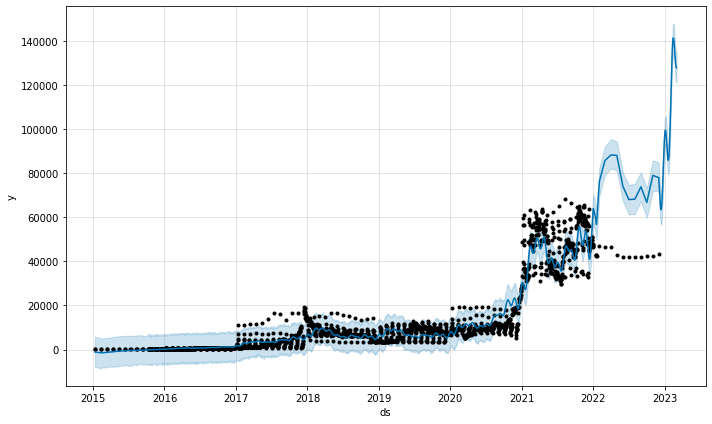

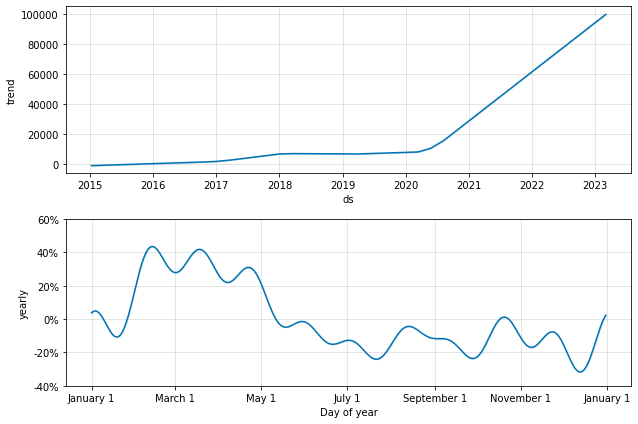

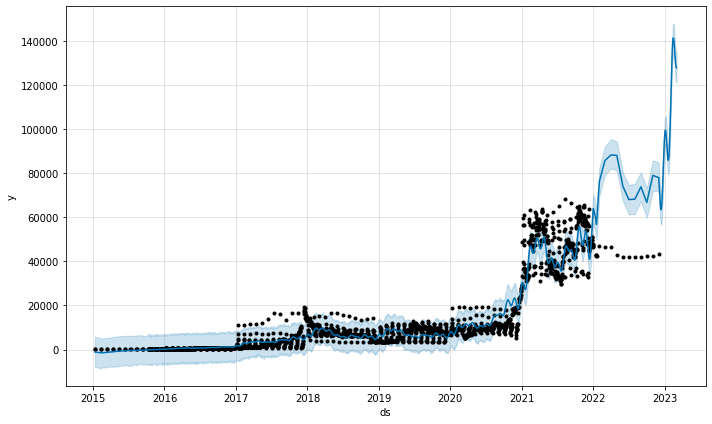

In [12]:
# plot the model forecast chart with component charts in trend and seasonality 
model.plot_components(forecast)
model.plot(forecast)